In [10]:
# import the dataset from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# import other required libs
import pandas as pd
import numpy as np

# viz libs
import matplotlib.pyplot as plt
import seaborn as sns

Читаем данные

In [11]:
df_full = pd.read_json('preprocessed_text.json')

Оставляем только нужные категории

In [3]:
df_full['clean_descr'] = df_full['d_wo_sw'].apply(lambda x: ' '.join(x))
df = df_full[['clean_descr', 'proffesional_roles']]
not_to_delete = ['Системный аналитик' ,'Продуктовый аналитик', 'Финансовый аналитик, инвестиционный аналитик',
 'Маркетолог-аналитик', 'Бизнес-аналитик', 'BI-аналитик, аналитик данных', 'Руководитель отдела аналитики', 'Дата-сайентист', 'Аналитик']
df = df[df['proffesional_roles'].isin(not_to_delete)]
df = df.drop_duplicates(['clean_descr'])
df.reset_index(drop = True, inplace=True)

In [4]:
# initialize the vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(df['clean_descr'])

In [5]:
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=8, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [7]:
# assign clusters and pca vectors to our dataframe 
df['cluster'] = clusters
df['x0'] = x0
df['x1'] = x1

In [8]:
df.groupby(by = ['cluster', 'proffesional_roles']).count()

clean_descr    x0    x1
cluster proffesional_roles                                                   
0       BI-аналитик, аналитик данных                          498   498   498
        Аналитик                                             2103  2103  2103
        Бизнес-аналитик                                       315   315   315
        Дата-сайентист                                         22    22    22
        Маркетолог-аналитик                                   128   128   128
...                                                           ...   ...   ...
7       Бизнес-аналитик                                        14    14    14
        Маркетолог-аналитик                                     3     3     3
        Продуктовый аналитик                                    4     4     4
        Системный аналитик                                      5     5     5
        Финансовый аналитик, инвестиционный аналитик           59    59    59

[67 rows x 3 columns]

In [9]:
def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10)


Cluster 0
бизнес,sql,метрика,компания,продукт,аналитик,который,наш,команда,данные

Cluster 1
компания,документация,технический,проект,заказчик,система,требование,разработка,процесс,бизнес

Cluster 2
консультант,бизнес,процесс,система,внедрение,пользователь,учёт,конфигурация,erp,1с

Cluster 3
цена,аналитический,excel,конкурент,маркетинговый,компания,рынок,анализ,товар,продажа

Cluster 4
высокий,отчёт,компания,подготовка,отчётность,данные,анализ,аналитический,excel,финансовый

Cluster 5
архитектура,бизнес,понимание,rest,команда,проектирование,система,требование,системный,разработка

Cluster 6
заключение,анализ,финансовый,страхование,банковский,льготный,корпоративный,кредитование,кредитный,банк

Cluster 7
we,work,experience,for,to,with,in,the,of,and


In [44]:
# map clusters to appropriate labels 
cluster_map = {0: "sport", 1: "tech", 2: "religion"}
# apply mapping
df['cluster'] = df['cluster'].map(cluster_map)

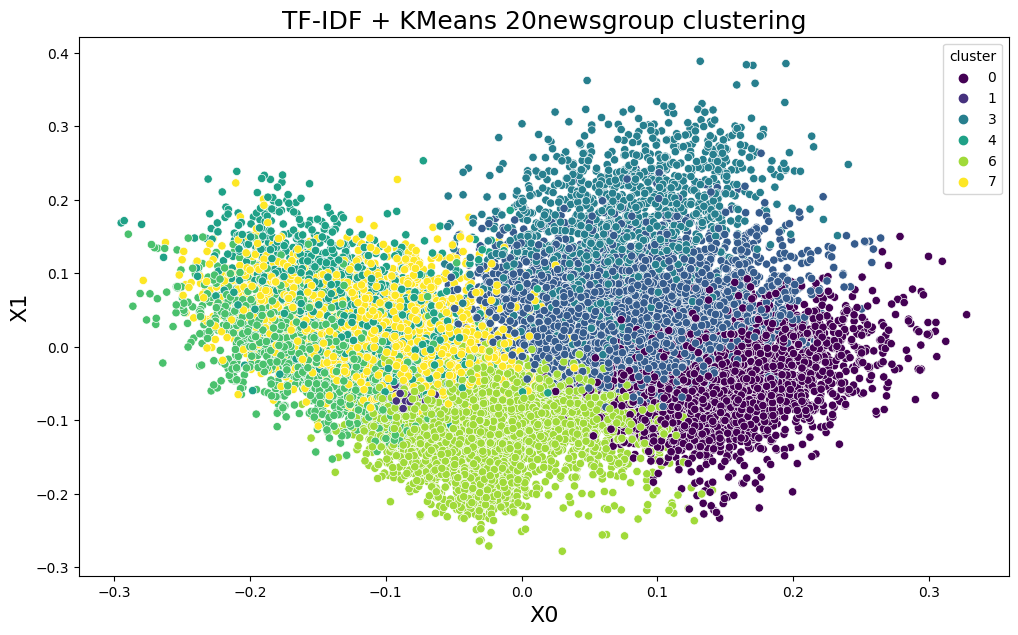

In [48]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("TF-IDF + KMeans 20 vacancies", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette="viridis")
plt.show()